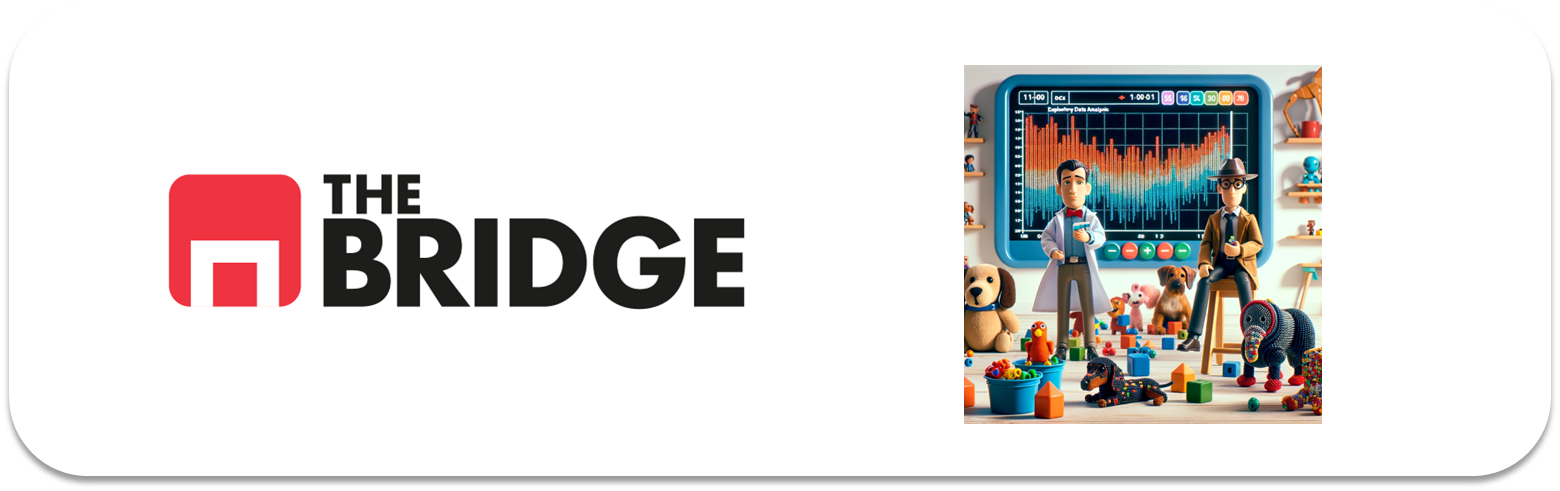

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [22]:
# cargando galerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion, bubble_plot

from scipy.stats import mannwhitneyu, chi2_contingency


## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [24]:
# Cargando dataset del Titanic
df_titanic_1 = pd.read_csv("./data/titanic.csv")


In [25]:
# Mostrando la info del dataset
df_titanic_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [26]:
# Mostrando los nulos. Hay nulos en: age, embarked, deck, y embarked
df_titanic_1.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [27]:
# Visualizando DataFrame
df_titanic_1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [28]:
# Eliminando las columnas
df_titanic_1.drop(columns=['deck', 'survived', 'pclass', 'embarked'], inplace=True)
df_titanic_1

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True
888,female,NaN,1,2,23.4500,Third,woman,False,Southampton,no,False
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [30]:
# Sumando las columnas
df_titanic_1['family_members'] = df_titanic_1['parch'] + df_titanic_1['sibsp']
df_titanic_1


,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,1,2,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True,0


In [31]:
# Eliminando las columnas 'parch' y 'sibsp'
df_titanic_1.drop(columns=['parch', 'sibsp'], inplace=True)
df_titanic_1


,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [35]:
# Imputando la moda
df_titanic_1['embark_town'].fillna(df_titanic_1['embark_town'].mode()[0], inplace=True)


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [34]:
# Imputo el valor por who en age: (creo una máscaras)
es_woman = df_titanic_1.who == "woman"
es_child = df_titanic_1.who == "child"
es_man = df_titanic_1.who == "man"

# Calculando la media de niños, mujeres y hombres
media_woman = df_titanic_1.loc[es_woman, "age"].mean()
media_child = df_titanic_1.loc[es_child, "age"].mean()
media_man = df_titanic_1.loc[es_man, "age"].mean()

# Máscaras de valores nulos
es_age_nulo = df_titanic_1.age.isna()

df_titanic_1.loc[es_woman & es_age_nulo, "age"] = media_woman
df_titanic_1.loc[es_child & es_age_nulo, "age"] = media_child
df_titanic_1.loc[es_man & es_age_nulo, "age"] = media_man

In [ ]:
# Verificado los nulos
df_titanic_1.isna().sum()

sex               0
age               0
fare              0
class             0
who               0
adult_male        0
embark_town       0
alive             0
alone             0
family_members    0
dtype: int64

### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [45]:
# 1 Sobrevivencia por género
# 1.1 En términos absolutos
gender_survival_count = df_titanic_1.groupby(['who', 'alive']).size().unstack()
gender_survival_count


alive,no,yes
who,,
child,34,49
man,449,88
woman,66,205


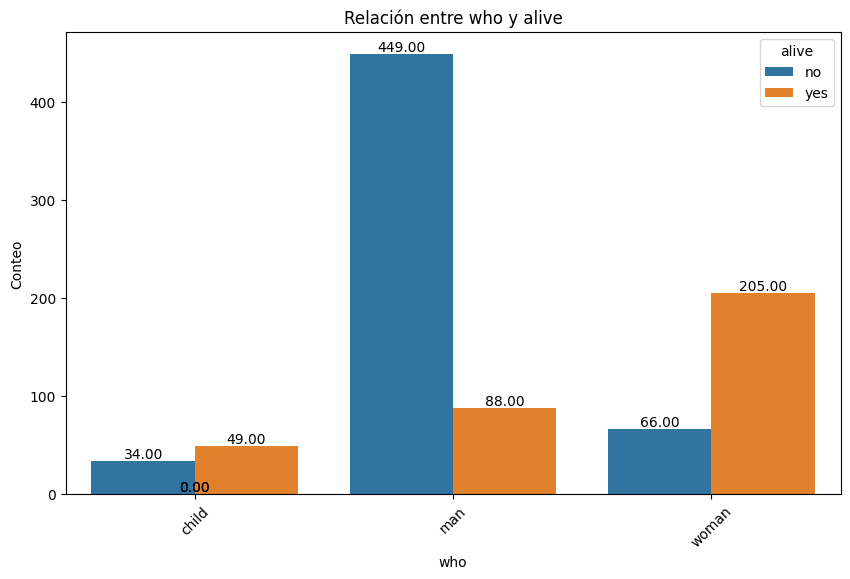

In [46]:
plot_categorical_relationship_fin(df_titanic_1, "who", "alive", show_values= True)

In [47]:
# 1 Sobrevivencia por género
# 1.2 En términos relativos
gender_survival_rate = gender_survival_count.div(gender_survival_count.sum(axis=1), axis=0)
gender_survival_rate

alive,no,yes
who,,
child,0.409639,0.590361
man,0.836127,0.163873
woman,0.243542,0.756458


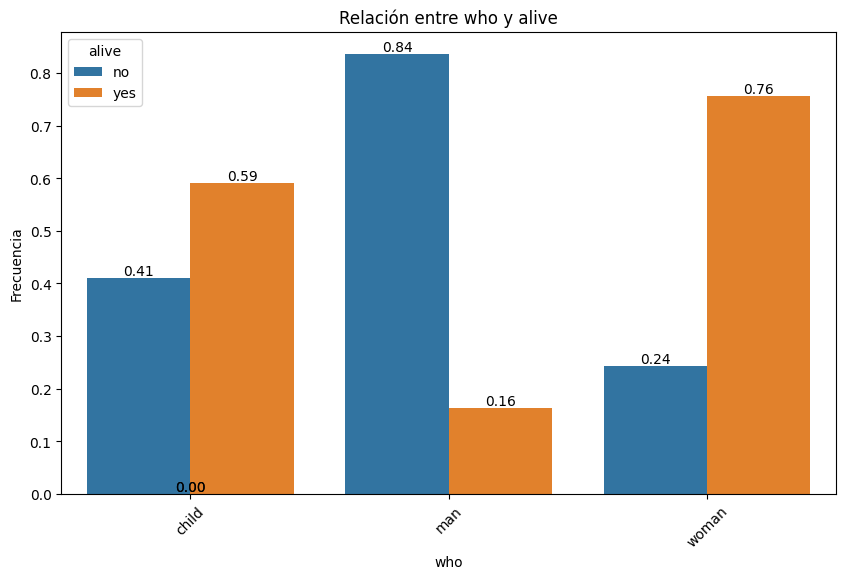

In [49]:
plot_categorical_relationship_fin(df_titanic_1, "who", "alive", relative_freq= True, show_values= True)

In [ ]:
# 1 Sobrevivencia por género
# 1.3 Realizando test de hipótesis, la cual es menor a 0.05. Por lo tanto, hay una relación entre las variables
chi2, p, dof, expected = chi2_contingency(gender_survival_count)
print(f"Valor p: {p}")

Valor p: 2.2227620817798914e-62


In [52]:
# 2 Sobrevivencia por clase
# 2.1 En términos absolutos
class_survival_count = df_titanic_1.groupby(['who', 'alive']).size().unstack()
print(class_survival_count)


alive   no  yes
who            
child   34   49
man    449   88
woman   66  205


In [54]:
# 2 Sobrevivencia por clase
# 2.2 En términos relativos
class_survival_rate = class_survival_count.div(class_survival_count.sum(axis=1), axis=0)
class_survival_rate

alive,no,yes
who,,
child,0.409639,0.590361
man,0.836127,0.163873
woman,0.243542,0.756458


In [ ]:
# 2 Sobrevivencia por clase
# 2.3 Test de hipótesis la cual es menor a 0.05. Por lo tanto, hay una relación entre las variables
chi2, p, dof, expected = chi2_contingency(class_survival_count)
print(f"Valor p: {p}")

Valor p: 2.2227620817798914e-62


In [56]:
# 3 Supervivencia por ciudad de embarque
# 3.1 En términos absolutos
town_survival_count = df_titanic_1.groupby(['embark_town', 'alive']).size().unstack()
town_survival_count

alive,no,yes
embark_town,,
Cherbourg,75,93
Queenstown,47,30
Southampton,427,219


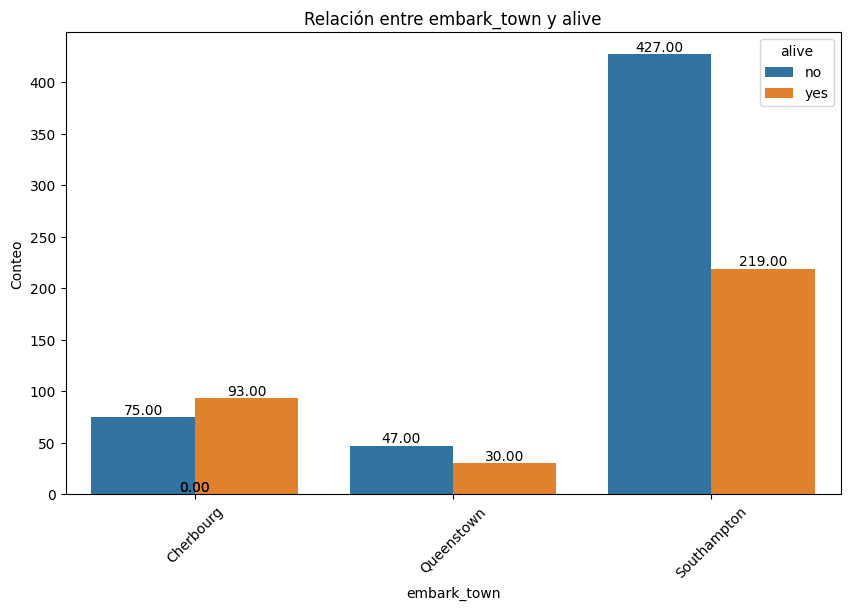

In [62]:
plot_categorical_relationship_fin(df_titanic_1, "embark_town", "alive", show_values= True)

In [57]:
# 3 Supervivencia por ciudad de embarque
# 3.2 En términos relativos
town_survival_rate = town_survival_count.div(town_survival_count.sum(axis=1), axis=0)
town_survival_rate

alive,no,yes
embark_town,,
Cherbourg,0.446429,0.553571
Queenstown,0.610390,0.389610
Southampton,0.660991,0.339009


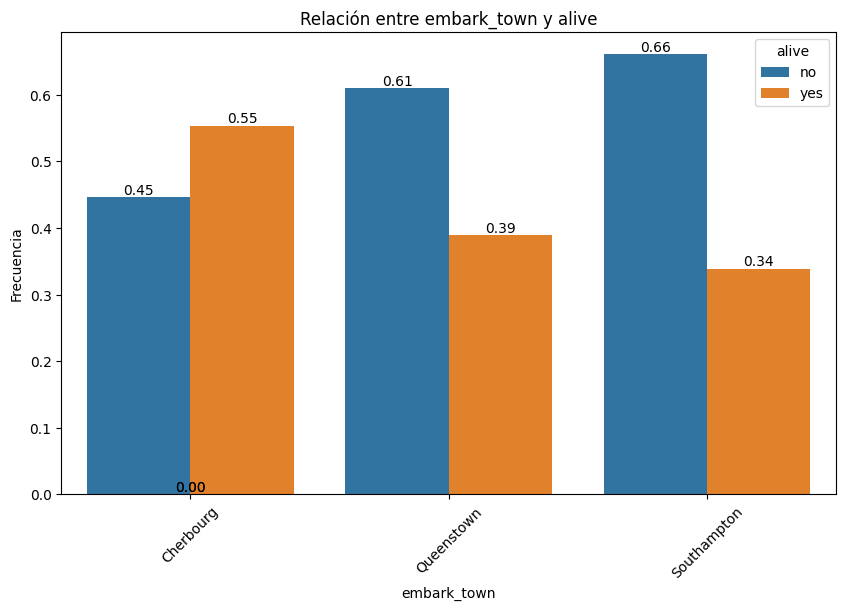

In [65]:
plot_categorical_relationship_fin(df_titanic_1, "embark_town", "alive", relative_freq=True, show_values= True)

In [ ]:
# 3 Supervivencia por ciudad de embarque la cual es menor a 0.05. Por lo tanto, hay una relación entre las variables
# 3.3 Test de hipótesis
chi2, p, dof, expected = chi2_contingency(town_survival_count)
print(f"Valor p: {p}")

Valor p: 2.3008626481449577e-06


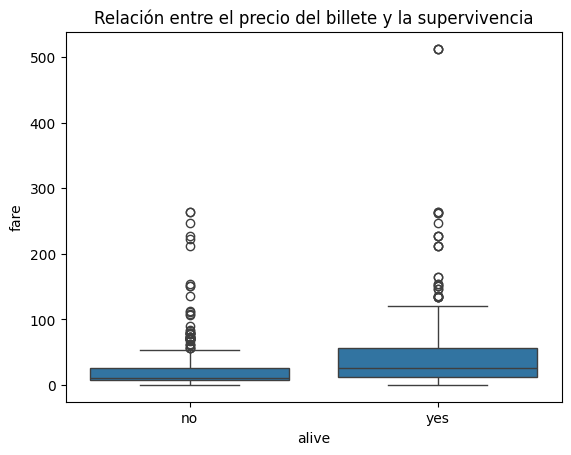

In [59]:
# 4. Relación entre el precio del billete y la supervivencia
sns.boxplot(x='alive', y='fare', data=df_titanic_1)
plt.title('Relación entre el precio del billete y la supervivencia')
plt.show()

In [ ]:
# 5 Pasajeros que no pagaron el billete
free_passengers = df_titanic_1[df_titanic_1['fare'] == 0]
print(f"Pasajeros que no pagaron el billete: {free_passengers}")


Pasajeros que no pagaron el billete:       sex        age  fare   class  who  adult_male  embark_town alive  alone  \
179  male  36.000000   0.0   Third  man        True  Southampton    no   True   
263  male  40.000000   0.0   First  man        True  Southampton    no   True   
271  male  25.000000   0.0   Third  man        True  Southampton   yes   True   
277  male  33.173123   0.0  Second  man        True  Southampton    no   True   
302  male  19.000000   0.0   Third  man        True  Southampton    no   True   
413  male  33.173123   0.0  Second  man        True  Southampton    no   True   
466  male  33.173123   0.0  Second  man        True  Southampton    no   True   
481  male  33.173123   0.0  Second  man        True  Southampton    no   True   
597  male  49.000000   0.0   Third  man        True  Southampton    no   True   
633  male  33.173123   0.0   First  man        True  Southampton    no   True   
674  male  33.173123   0.0  Second  man        True  Southampton    no  

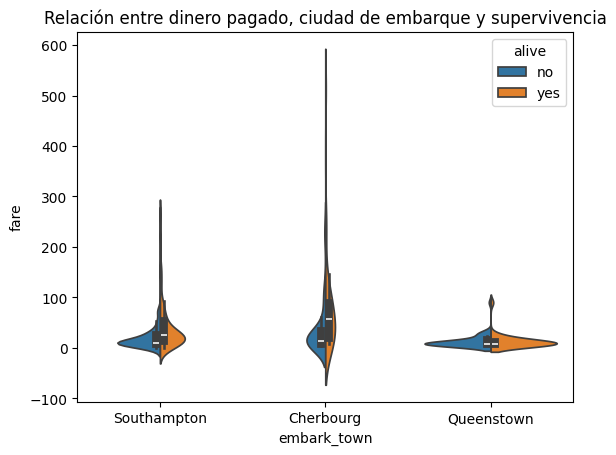

In [67]:
# 6. Relación entre el dinero pagado, ciudad de embarque y supervivencia
# Gráfico de violín para observar la relación
sns.violinplot(x='embark_town', y='fare', hue='alive', data=df_titanic_1, split=True)
plt.title('Relación entre dinero pagado, ciudad de embarque y supervivencia')
plt.show()


## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [68]:
# Cargando dataset del viajes_junio
viajes_junio_df = pd.read_csv("./data/dataset_viajes_jun23.csv")

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

aircompany
Airnar        40529397.82
FlyQ          43374852.87
MoldaviAir    72894268.81
PamPangea     55974794.70
TabarAir      38487996.70
Name: ingresos, dtype: float64


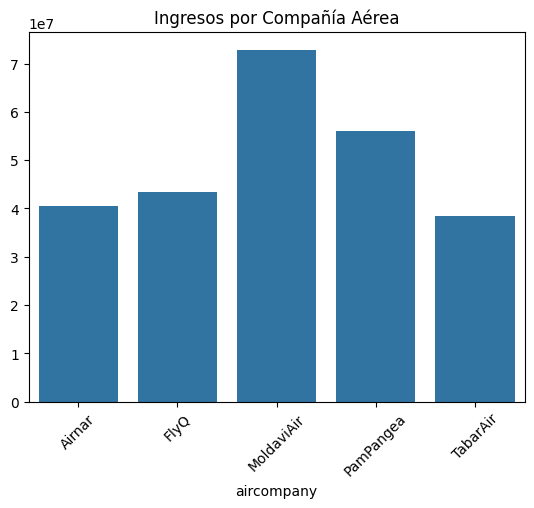

In [70]:
aircompany_income = viajes_junio_df.groupby('aircompany')['ingresos'].sum()
print(aircompany_income)

sns.barplot(x=aircompany_income.index, y=aircompany_income.values)
plt.title('Ingresos por Compañía Aérea')
plt.xticks(rotation=45)
plt.show()


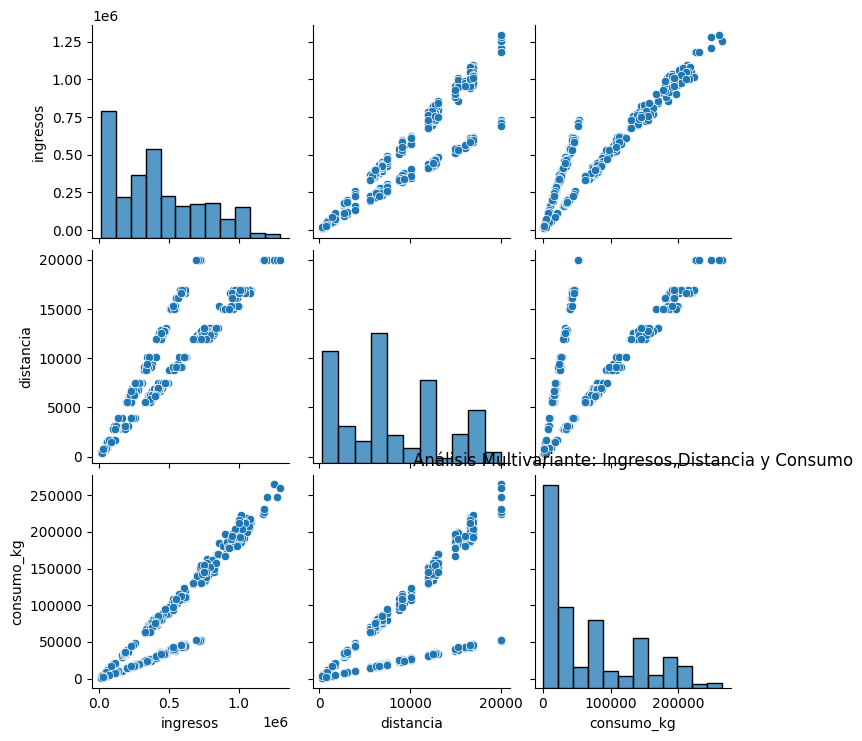

In [73]:
sns.pairplot(viajes_junio_df, vars=['ingresos', 'distancia', 'consumo_kg'])
plt.title('Análisis Multivariante: Ingresos,Distancia y Consumo')
plt.show()


### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

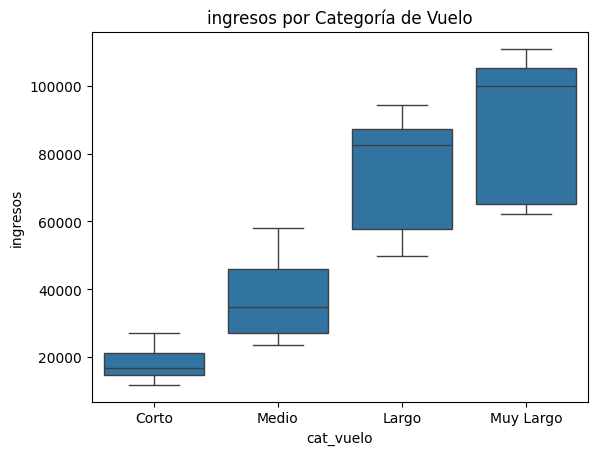

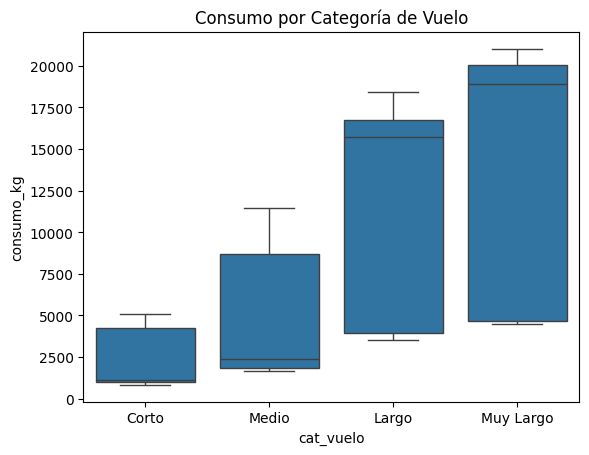

In [76]:
# Definiendo los rangos para la categorización
bins = [0, 500, 1000, 1500, 2000]
labels = ['Corto', 'Medio', 'Largo', 'Muy Largo']
viajes_junio_df['cat_vuelo'] = pd.cut(viajes_junio_df['distancia'], bins=bins, labels=labels)

# Análizando multivariante con "cat_vuelo", "ingresos", "consumo_kg"
sns.boxplot(x='cat_vuelo', y='ingresos', data=viajes_junio_df)
plt.title('ingresos por Categoría de Vuelo')
plt.show()

sns.boxplot(x='cat_vuelo', y='consumo_kg', data=viajes_junio_df)
plt.title('Consumo por Categoría de Vuelo')
plt.show()


### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.